# Decision tree classifier for SDSS DR14


This data set is taken from the fourteenth data release of the Sloan Digital Sky Survey (SDSS DR14). It consists of 10,000 records of observations from SDSS. Each observation is then identified as either a star, galaxy or a quasar.

In this notebook we will explore how we can code a decision tree to classify each celestial obejct within this data set (stars, galaxies and quasars), as well as looking at the overall accuracy of this classical machine learning technique.

# Necessary Libraries
Here we will install the necessary libraries that we need to make the decision tree classifier. We will be using pandas, Scikit-learn and matplotlib.

In [ ]:
import pandas as pd # Used to read the data files that are uploaded to the notebook
from sklearn.tree import DecisionTreeClassifier # Used to create and train a decision tree for classification tasks
from sklearn.model_selection import train_test_split # Splits the data into training and testing subsets
from sklearn.tree import plot_tree # Used to visualise a trained tree in a graphical format
from sklearn.metrics import classification_report, accuracy_score # This will generate a detailed report on classification performance. accuracy score will compute the overall accuracy of the preidictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Generates a confusion matrix to show true or false positives or negatives, as well as visualising the matrix with a heatmap
import matplotlib.pyplot as plt # Data visualisation library for Python, needed to make the plots
from sklearn.preprocessing import MinMaxScaler

# Loading and understanding the data set

In order to analyse the data, we will first have to load the data set and read it with pandas.

We will then preview what is within this data set

In [ ]:
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

Below we'll print out the first few rows of the data set

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


What we see from this table is the observed object's ID, the objects position in the sky, right ascention (ra) and declination (dec). The magnitudes observed in each of the telescope's filters (u, g, r, i and z), the class of each object and their redshifts. Note how some of the redshifts are negative, this means that this is a blueshift (the object is moving towards us).

# Selecting features and target variables

Now that we understand what the dataset describes, we can now move on to selecting our featres that we want to include in our model from the data, as well as chosing what we want our model to target.

In [ ]:
features = data[['u', 'g', 'r', 'i', 'z']]  # Optionally include redshift for higher accuracy
target = data['class']

In this notebook we are focusing on classifying the celestial objects so we choose our target to be the 'class' of each object, but the target can be changed to any columm from the data

# Splitting the data and training the model

In this section, we will split the data intro training and testing subsets.

We split up the data into these subsets so that we can allow the model to learn patterns, rules and relationships from the dataset. Then the testing subset is then used to evaluate our model's perfomance on unseen data.

Typically we split the data into a 80:20 ratio, this means we train the data with 80% of the data and then evaluate the performance of the model with the remaining 20%

Splitting the data up also allows us to avoid overfitting the model. Essentially this means that the model will memorise the training data, which gives a strong performance on that data but a very poor performance on the unseen data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

The ratio between the training and testing subsets can be modified freely, try playing with the ratio and see how the model performs!

# Controlling the tree's complexity

Now that the data is split into the training and testing subsets, we can tweak how complex or 'deep' we want our tree to be. This is depth control and it will limit how the model captures patterns in the data.

A deeper tree can capture more patterns in the data, but this can lead to overfitting, however if the depth is set too low then the model will begin to underfit the data.

Controlling the depth is also linked to the bias and variance of the model. A deeper tree will lead to less bias but more variance, whereas a shallower tree will generalise the data better, but could potentially be more biased.

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

To start with, we'll set the `max_depth` to be 4 so that later on we can better visualise the process behind the tree, but this can be adjusted if the model begins to underfit.

We also use the random state variable, this is to control the randomness of certain functions in the machine learning library such as `train_test_split` or initialising random processes, e.g. `DecisionTreeClassifier`. We set this variable to 42 as this ensures consistent results across runs.

# Evaluate the model

Having played around with the training and testing ratio as well as implementing some depth control to our model, we can now evaluate how our model performs when we introduce it to the unseen data.


In [ ]:
y_pred = clf.predict(X_test) # This is where we make our predictions with the model

accuracy = accuracy_score(y_test, y_pred) # This will compute the accuracy of the model
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred) # This will generate a detailed report on classification performance
print("Classification Report:")
print(report)

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.82      0.67      0.74       996
         QSO       0.83      0.80      0.81       190
        STAR       0.65      0.80      0.72       814

    accuracy                           0.74      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.75      0.74      0.74      2000



# Visualisation

Here we can visualise the tree so that we can better understand the processes behind the tree. Visualising the tree allows us to diagnose if the model is underperforming or overfitting.

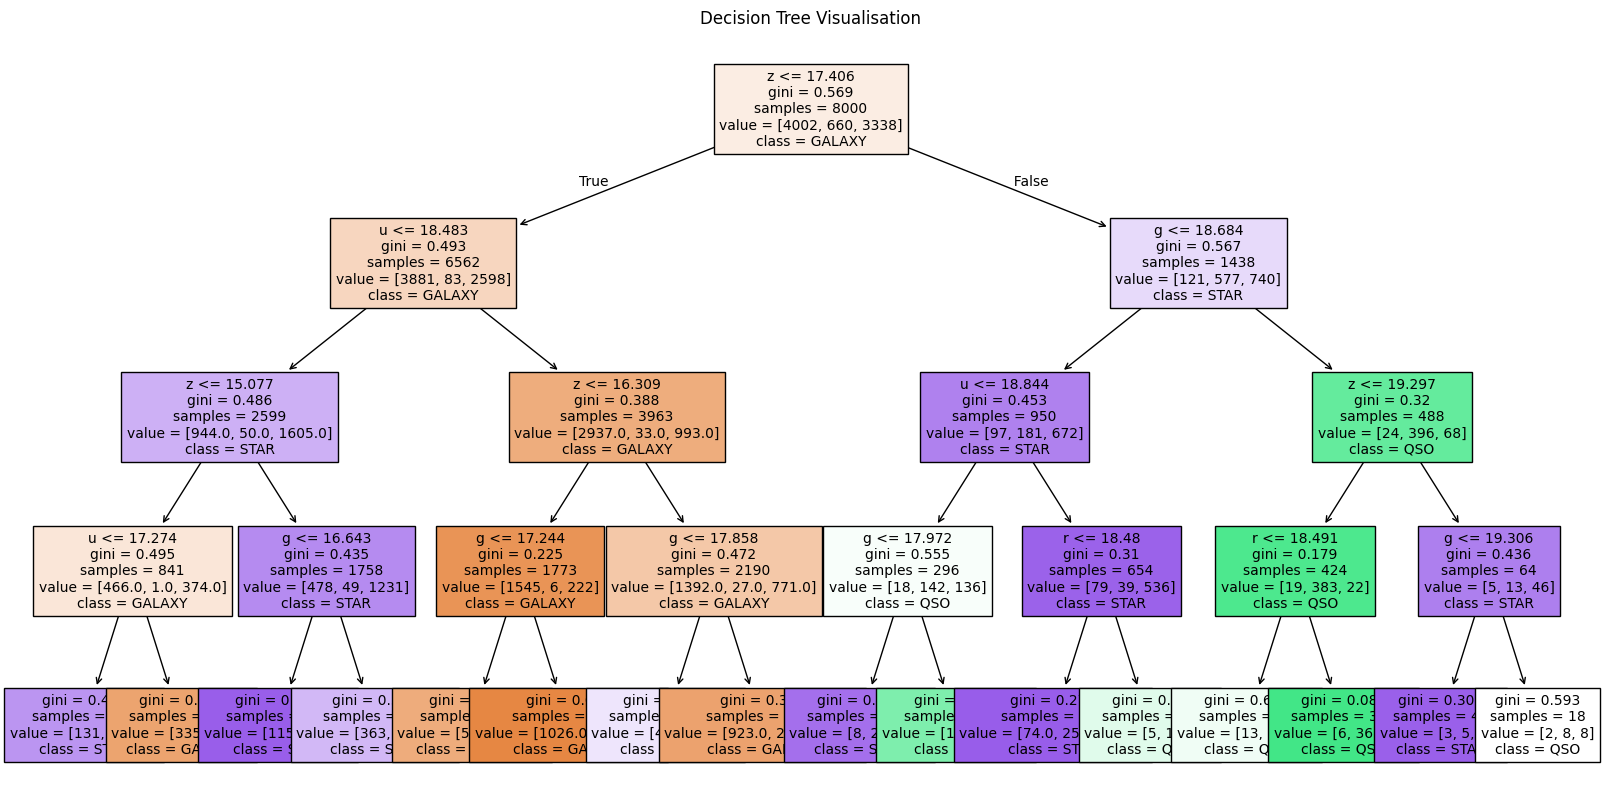

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=clf.classes_, filled=True, fontsize=10)
plt.title("Decision Tree Visualisation")
plt.show()

We'll also create a confusion matrix, so that we can see the model performance and behaviour.

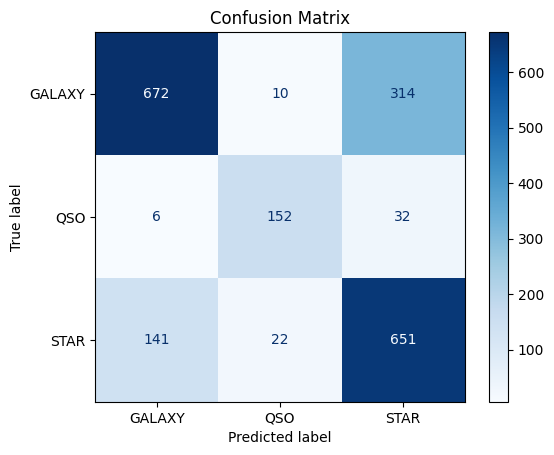

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title("Confusion Matrix")
plt.show()